<a href="https://colab.research.google.com/github/BuczynskiRafal/ML/blob/main/supervised/03_classification/01_logistic_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model klasyfikacyjny który będzie przewidywal raka pieri



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
# ustawienie opcji wyświetlania tablic numpy array
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)
sklearn.__version__

'1.0.2'

###  <a name='a2'></a>  Regresja Logistyczna (Logistic Regression) - wprowadzenie

Pomimo nazwy jest to liniowy model do zadań klasyfikacyjnych. Inna nazwa Logit Regression. 

#### Przykłady zastosowań:
- przewidywanie czy mail jest spamem, czy też nie
- przewidywanie czy użytkownik kliknie w reklamę
- przewidywanie czy nowotwór jest złośliwy czy też nie
- przewidywanie czy dłużnik spłaci wierzycielowi dług, czy też zajdzie zdarzenie default
- przewidywanie czy transakcja jest próbą oszustwa

Przy budowie modelu regresji logistycznej wykorzystamy funkcję sigmoid. Definiuje się ją wzorem:
$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

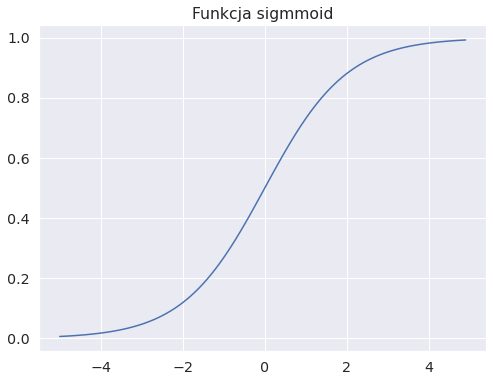

In [7]:
# najwiekszą zaletą funkcji sigmoid jest to że wartość mieści się w przedziale 0-1

# definicja funkcji sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.title('Funkcja sigmmoid')
plt.show()

Następnie rozważmy funkcję liniową $y = w_0 + w_1x$. Podstawiając to do funkcji sigmoid otrzymujemy:
$$p(x) = \frac{1}{1 + e^{-(w_0 + w_1x)}}$$
Dzięki temu przekształceniu regresja logistyczna zwraca nam wartości z przedziału $(0, 1)$ co możemy interpretować jako prawdopodobieństwo i na podstawie tych prawdopodobieństw przewidywać poszczególne klasy.

# załadowanie danych

In [10]:
# przykładowe dane z biblioteki sklearn
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# informacje o danych
print(raw_data.DESCR)

In [11]:
# kopiuję dane i wyciągam z nich dane 'data' i zmienną docelową 'target'

all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(f'rozmiar data: {data.shape}')
print(f'rozmiar target: {target.shape}')

rozmiar data: (569, 30)
rozmiar target: (569,)


# Podział danych na zbiór treningowy i testowy


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target)

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (426, 30)
y_train shape: (426,)
x_test shape: (143, 30)
y_test shape: (143,)


In [15]:
x_train

array([[13.80, 15.79, 90.43, 584.10, 0.10, 0.13, 0.08, 0.05, 0.17, 0.07, ..., 16.57, 20.86, 110.30, 812.40, 0.14, 0.35, 0.28, 0.14, 0.26, 0.10],
       [11.34, 21.26, 72.48, 396.50, 0.09, 0.07, 0.05, 0.02, 0.15, 0.07, ..., 13.01, 29.15, 83.99, 518.10, 0.17, 0.22, 0.31, 0.08, 0.28, 0.09],
       [15.66, 23.20, 110.20, 773.50, 0.11, 0.31, 0.32, 0.14, 0.25, 0.08, ..., 19.85, 31.64, 143.70, 1226.00, 0.15, 0.52, 0.62, 0.25, 0.33, 0.10],
       [14.53, 13.98, 93.86, 644.20, 0.11, 0.09, 0.07, 0.06, 0.17, 0.06, ..., 15.80, 16.93, 103.10, 749.90, 0.13, 0.15, 0.14, 0.11, 0.26, 0.08],
       [28.11, 18.47, 188.50, 2499.00, 0.11, 0.15, 0.32, 0.16, 0.16, 0.06, ..., 28.11, 18.47, 188.50, 2499.00, 0.11, 0.15, 0.32, 0.16, 0.16, 0.06],
       [12.87, 19.54, 82.67, 509.20, 0.09, 0.08, 0.02, 0.02, 0.19, 0.06, ..., 14.45, 24.38, 95.14, 626.90, 0.12, 0.17, 0.07, 0.06, 0.33, 0.08],
       [13.82, 24.49, 92.33, 595.90, 0.12, 0.17, 0.14, 0.07, 0.23, 0.07, ..., 16.01, 32.94, 106.00, 788.00, 0.18, 0.40, 0.34, 0

# standaryzacja danych

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# dane dopasowuje się tylko na zbiorze treningowym
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[-0.06, -0.81, -0.03, -0.17, 0.33, 0.49, -0.12, 0.07, -0.57, 0.40, ..., 0.09, -0.77, 0.12, -0.10, 0.40, 0.65, 0.05, 0.39, -0.51, 1.03],
       [-0.76, 0.47, -0.77, -0.71, -0.63, -0.74, -0.46, -0.76, -1.22, 0.34, ..., -0.65, 0.58, -0.67, -0.62, 1.68, -0.21, 0.21, -0.47, -0.13, 0.23],
       [0.47, 0.93, 0.78, 0.36, 1.08, 4.13, 2.97, 2.37, 2.55, 2.57, ..., 0.77, 0.99, 1.12, 0.63, 0.82, 1.70, 1.70, 2.06, 0.60, 0.97],
       [0.15, -1.23, 0.11, -0.00, 1.01, -0.21, -0.23, 0.45, -0.61, -0.23, ..., -0.07, -1.41, -0.10, -0.21, 0.12, -0.67, -0.64, -0.10, -0.49, -0.33],
       [3.99, -0.18, 4.01, 5.26, 1.32, 0.96, 3.00, 2.94, -0.62, -1.07, ..., 2.48, -1.16, 2.46, 2.88, -0.79, -0.65, 0.25, 0.71, -2.03, -1.57],
       [-0.32, 0.07, -0.35, -0.39, -0.35, -0.48, -0.89, -0.71, 0.18, 0.09, ..., -0.35, -0.20, -0.33, -0.42, -0.47, -0.56, -0.96, -0.76, 0.66, -0.37],
       [-0.06, 1.23, 0.05, -0.14, 1.47, 1.29, 0.63, 0.52, 1.73, 1.34, ..., -0.03, 1.20, -0.01, -0.14, 2.10, 0.93, 0.34, 0.60, 1.20, 1.

In [17]:
# statystyki obliczone przez scaler
scaler.mean_

array([14.02, 19.25, 91.19, 645.51, 0.10, 0.10, 0.09, 0.05, 0.18, 0.06, 0.41, 1.22, 2.87, 40.34, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 16.14, 25.59, 106.30, 867.53, 0.13, 0.25, 0.27, 0.11, 0.29, 0.08])

In [19]:
# statystyki obliczone przez scaler
scaler.scale_

array([3.53, 4.27, 24.27, 352.46, 0.01, 0.05, 0.08, 0.04, 0.03, 0.01, 0.28, 0.57, 2.07, 48.18, 0.00, 0.02, 0.03, 0.01, 0.01, 0.00, 4.82, 6.13, 33.35, 567.32, 0.02, 0.16, 0.21, 0.06, 0.06, 0.02])

# Dopasowanie modelu

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

# Predykcja na podstawie modelu

In [24]:
# zwraca konkretną predykcję
y_pred = log_reg.predict(x_test)
y_pred[:30]

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [27]:
# zwraca konkretne prawdopodobieństwa
y_prob = log_reg.predict_proba(x_test)
y_prob[:30]

array([[0.01, 0.99],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.03, 0.97],
       [1.00, 0.00],
       [0.10, 0.90],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.06, 0.94],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.01, 0.99],
       [1.00, 0.00],
       [0.51, 0.49],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.02, 0.98],
       [1.00, 0.00],
       [0.07, 0.93],
       [0.00, 1.00],
       [0.12, 0.88],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00]])

# Ocena modelu

Accuracy: 0.986013986013986


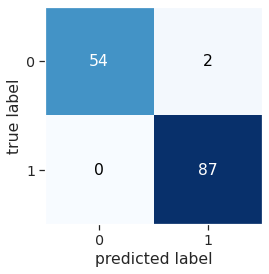

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [29]:
def plot_confusion_matrix(cm):
    # klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.98      1.00      0.99        87

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

